Run in terminal: `pip install lifetimes`

Original link at Github: https://github.com/CamDavidsonPilon/lifetimes

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import lifelines

/Users/flavio.clesio/anaconda/lib/python3.5/site-packages/pandas/computation/__init__.py:19: UserWarning: The installed version of numexpr 2.4.4 is not supported in pandas and will be not be used

  UserWarning)


In [2]:
%pylab inline
pylab.rcParams['figure.figsize'] = (14, 9)

Populating the interactive namespace from numpy and matplotlib


In [3]:
from lifetimes.datasets import load_cdnow

In [4]:
data = load_cdnow(index_col=[0])

In [5]:
data.head()

,frequency,recency,T
ID,,,
1,2,30.43,38.86
2,1,1.71,38.86
3,0,0.00,38.86
4,0,0.00,38.86
5,0,0.00,38.86


In [6]:
from lifetimes import BetaGeoFitter

In [7]:
bgf = BetaGeoFitter(penalizer_coef=0.0)

In [8]:
bgf.fit(data['frequency'], data['recency'], data['T'])

/Users/flavio.clesio/anaconda/lib/python3.5/site-packages/lifetimes/estimation.py:578: RuntimeWarning: invalid value encountered in log
  A_4 = log(a) - log(b + freq - 1) - (r + freq) * log(rec + alpha)


<lifetimes.BetaGeoFitter: fitted with 2357 subjects, a: 0.79, alpha: 4.41, b: 2.43, r: 0.24>

In [9]:
from lifetimes.plotting import plot_frequency_recency_matrix

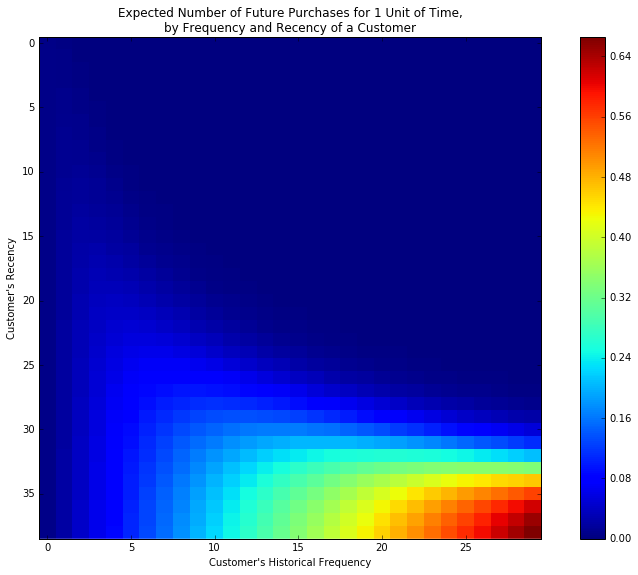

In [10]:
plot_frequency_recency_matrix(bgf)

In [11]:
from lifetimes.plotting import plot_probability_alive_matrix

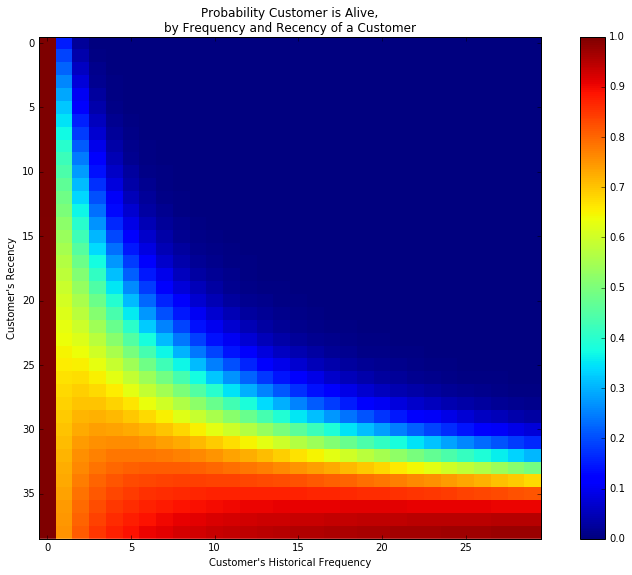

In [12]:
plot_probability_alive_matrix(bgf)

In [13]:
t = 1

In [14]:
data['predicted_purchases'] = bgf.conditional_expected_number_of_purchases_up_to_time(t, data['frequency'], data['recency'], data['T'])

In [15]:
data.sort_values(by='predicted_purchases').tail(5)

,frequency,recency,T,predicted_purchases
ID,,,,
509,18,35.14,35.86,0.424877
841,19,34.00,34.14,0.474738
1981,17,28.43,28.86,0.486526
157,29,37.71,38.00,0.662396
1516,26,30.86,31.00,0.710623


In [16]:
from lifetimes.plotting import plot_period_transactions

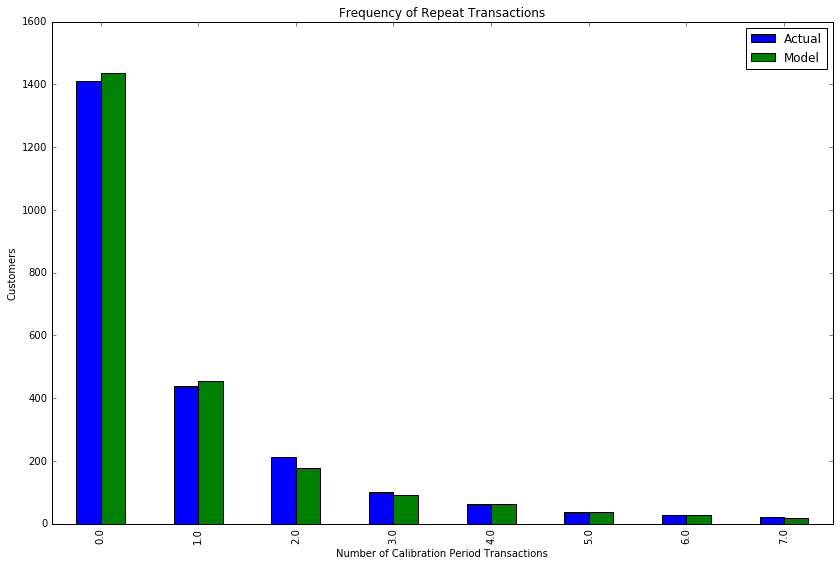

In [17]:
plot_period_transactions(bgf)

In [18]:
from lifetimes.datasets import load_transaction_data
from lifetimes.utils import summary_data_from_transaction_data

In [19]:
transaction_data = load_transaction_data()

In [20]:
transaction_data.head()

,date,id
0,2014-03-08 00:00:00,0
1,2014-05-21 00:00:00,1
2,2014-03-14 00:00:00,2
3,2014-04-09 00:00:00,2
4,2014-05-21 00:00:00,2


In [21]:
summary = summary_data_from_transaction_data(transaction_data, 'id', 'date', observation_period_end='2014-12-31')

In [22]:
summary.head()

,frequency,recency,T
id,,,
0,0.0,0.0,298.0
1,0.0,0.0,224.0
2,6.0,142.0,292.0
3,0.0,0.0,147.0
4,2.0,9.0,183.0


In [23]:
bgf.fit(summary['frequency'], summary['recency'], summary['T'])

/Users/flavio.clesio/anaconda/lib/python3.5/site-packages/lifetimes/estimation.py:578: RuntimeWarning: invalid value encountered in log
  A_4 = log(a) - log(b + freq - 1) - (r + freq) * log(rec + alpha)


<lifetimes.BetaGeoFitter: fitted with 5000 subjects, a: 1.83, alpha: 1.17, b: 3.33, r: 0.16>

In [24]:
from lifetimes.utils import calibration_and_holdout_data

In [25]:
summary_cal_holdout = calibration_and_holdout_data(transaction_data, 'id', 'date',
                                        calibration_period_end='2014-09-01',
                                        observation_period_end='2014-12-31' )   

In [26]:
summary_cal_holdout.head()

,frequency_cal,recency_cal,T_cal,frequency_holdout,duration_holdout
id,,,,,
0,0.0,0.0,177.0,0.0,121
1,0.0,0.0,103.0,0.0,121
2,6.0,142.0,171.0,0.0,121
3,0.0,0.0,26.0,0.0,121
4,2.0,9.0,62.0,0.0,121


In [27]:
from lifetimes.plotting import plot_calibration_purchases_vs_holdout_purchases

In [28]:
bgf.fit(summary_cal_holdout['frequency_cal'], summary_cal_holdout['recency_cal'], summary_cal_holdout['T_cal'])

/Users/flavio.clesio/anaconda/lib/python3.5/site-packages/lifetimes/estimation.py:578: RuntimeWarning: invalid value encountered in log
  A_4 = log(a) - log(b + freq - 1) - (r + freq) * log(rec + alpha)


<lifetimes.BetaGeoFitter: fitted with 5000 subjects, a: 1.90, alpha: 1.38, b: 3.52, r: 0.18>

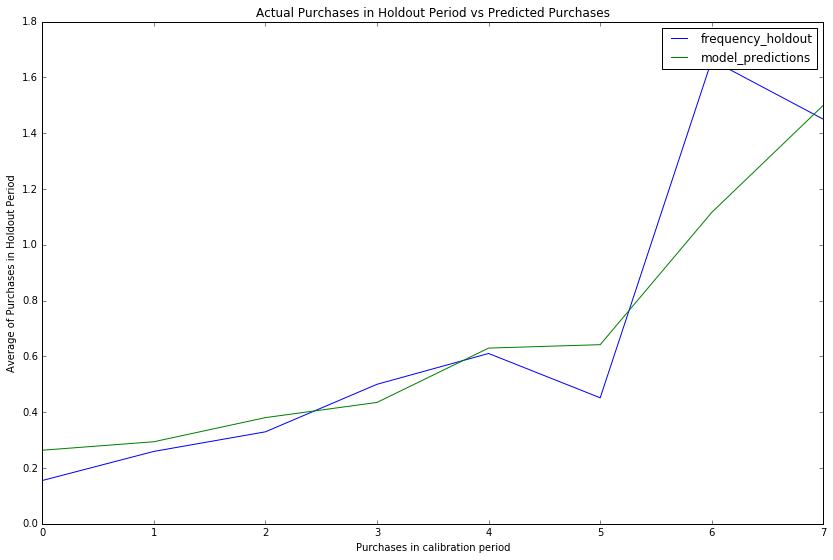

In [29]:
plot_calibration_purchases_vs_holdout_purchases(bgf, summary_cal_holdout)

In [30]:
t = 10 #predict purchases in 10 periods

In [31]:
individual = summary.iloc[20]

In [32]:
# The below function is an alias to `bfg.conditional_expected_number_of_purchases_up_to_time`
bgf.predict(t, individual['frequency'], individual['recency'], individual['T'])
# 0.0576511

0.058883949912694113

In [33]:
from lifetimes.plotting import plot_history_alive

In [34]:
id = 35
days_since_birth = 200

In [35]:
sp_trans = transaction_data.ix[transaction_data['id'] == id]

/Users/flavio.clesio/anaconda/lib/python3.5/site-packages/lifetimes/plotting.py:203: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).sum()
  customer_history = customer_history.resample(freq, how='sum').reset_index()
/Users/flavio.clesio/anaconda/lib/python3.5/site-packages/lifetimes/utils.py:209: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).sum()
  purchase_history = customer_history.resample(freq, how='sum').fillna(0)['transactions'].values


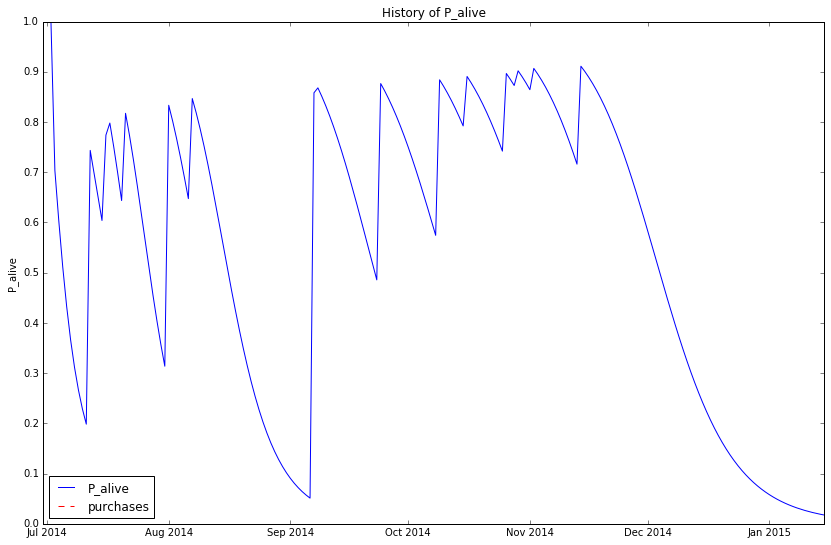

In [36]:
plot_history_alive(bgf, days_since_birth, sp_trans, 'date')

In [37]:
from lifetimes.datasets import load_summary_data_with_monetary_value

In [38]:
summary_with_money_value = load_summary_data_with_monetary_value()

In [39]:
summary_with_money_value.head()

,frequency,recency,T,monetary_value
customer_id,,,,
1,2,30.43,38.86,22.35
2,1,1.71,38.86,11.77
3,0,0.00,38.86,0.00
4,0,0.00,38.86,0.00
5,0,0.00,38.86,0.00


In [40]:
returning_customers_summary = summary_with_money_value[summary_with_money_value['frequency']>0]

In [41]:
returning_customers_summary.head()

,frequency,recency,T,monetary_value
customer_id,,,,
1,2,30.43,38.86,22.35
2,1,1.71,38.86,11.77
6,7,29.43,38.86,73.74
7,1,5.00,38.86,11.77
9,2,35.71,38.86,25.55


In [42]:
returning_customers_summary[['monetary_value', 'frequency']].corr()

,monetary_value,frequency
monetary_value,1.000000,0.113884
frequency,0.113884,1.000000


In [43]:
from lifetimes import GammaGammaFitter

In [44]:
ggf = GammaGammaFitter(penalizer_coef = 0)

In [45]:
ggf.fit(returning_customers_summary['frequency'],
        returning_customers_summary['monetary_value'])

<lifetimes.GammaGammaFitter: fitted with 946 subjects, p: 6.25, q: 3.74, v: 15.45>

In [46]:
print (ggf)  

<lifetimes.GammaGammaFitter: fitted with 946 subjects, p: 6.25, q: 3.74, v: 15.45>


In [47]:
print (ggf.conditional_expected_average_profit(
        summary_with_money_value['frequency'],
        summary_with_money_value['monetary_value']
    ).head())

customer_id
1    24.658611
2    18.911466
3    35.171000
4    35.171000
5    35.171000
dtype: float64


In [48]:
print ("Expected conditional average profit: %s, Average profit: %s" % (
    ggf.conditional_expected_average_profit(
        summary_with_money_value['frequency'],
        summary_with_money_value['monetary_value']
    ).mean(),
    summary_with_money_value[summary_with_money_value['frequency']>0]['monetary_value'].mean()
))

Expected conditional average profit: 35.25295629015605, Average profit: 35.07855179704026


In [49]:
bgf.fit(summary_with_money_value['frequency'], summary_with_money_value['recency'], summary_with_money_value['T'])

/Users/flavio.clesio/anaconda/lib/python3.5/site-packages/lifetimes/estimation.py:578: RuntimeWarning: invalid value encountered in log
  A_4 = log(a) - log(b + freq - 1) - (r + freq) * log(rec + alpha)


<lifetimes.BetaGeoFitter: fitted with 2357 subjects, a: 0.79, alpha: 4.41, b: 2.43, r: 0.24>

In [50]:
print (ggf.customer_lifetime_value(
    bgf, #the model to use to predict the number of future transactions
    summary_with_money_value['frequency'],
    summary_with_money_value['recency'],
    summary_with_money_value['T'],
    summary_with_money_value['monetary_value'],
    time=12, # months
    discount_rate=0.01 # monthly discount rate ~ 12.7% annually
).head(10))

customer_id
1      140.097075
2       18.943754
3       38.180724
4       38.180724
5       38.180724
6     1003.875934
7       28.110011
8       38.180724
9      167.419165
10      38.180724
Name: clv, dtype: float64
